# Description

Our customer is an IT company that has been successfully engaged in the development and consulting in the Russian market for the past 15 years. In December 2021, the company opened a new direction-the development of educational products for IT specialists-online advanced training and professional retraining courses. She plans to release educational programs to the market, which should: 

• prepare personnel in accordance with the requirements of the modern labor market; 

• the cost should be competitive, but also correspond to the purchasing power of people (it is now reduced); 

• Programs should be collected quickly in order to respond flexibly to demand, and the company could take its niche in the educational services market.


The task was to unload all vacancies in all specializations and sub -specializations located on the unloading date on the unloading date (May 26 and June 16) in all regions of the Russian Federation. 
** Region Roles (05/26/22) .xlsx ** 

Mandatory fields:

•	название вакансии (name)

•	описание вакансии (description)

•	регион вакансии (area)

•	дата размещения вакансии (published_at)

•	ключевые навыки (key_skills)

•	специализация (specialization.profarea_name)

•	подспециализация (specialization)


# Data exploration analysis (EDA)

## 1. Dattrying Datapram

In [1]:
!gdown --id 1DpgM5IXs_3YH-tu3TeIaHVsi8isrHljc

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
df = pd.read_excel('region roles (26.05.22).xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              69656 non-null  object 
 14  create

Checking duplicates throughout Datapram

In [4]:
df.duplicated().sum()

0

In [5]:
import json

In [6]:
def text_to_json(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []
df['specializations_json'] = df['specializations'].apply(text_to_json)

def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['profarea_name'])
    return out
  except:
    return []
df['specializations_list'] = df['specializations_json'].apply(get_values)

In [7]:
#Data filtering by category information technology throughout DF
def is_it(specializations_list):
  return 'Информационные технологии, интернет, телеком' in specializations_list
filter = df['specializations_list'].apply(is_it)
df=df[filter]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50390 entries, 0 to 69655
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                50390 non-null  int64  
 1   id                        50390 non-null  int64  
 2   premium                   50390 non-null  bool   
 3   name                      50390 non-null  object 
 4   department                4488 non-null   object 
 5   has_test                  50390 non-null  bool   
 6   response_letter_required  50390 non-null  bool   
 7   area                      50390 non-null  object 
 8   salary                    22724 non-null  object 
 9   type                      50390 non-null  object 
 10  address                   26912 non-null  object 
 11  response_url              0 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              50390 non-null  object 
 14  created_at 

Transformation of key skills to the list

In [8]:
def text_to_json(text):
  try:
    return json.loads(text.replace('"', '').replace("'", '"'))
  except:
    return []
df['key_skills_json'] = df['key_skills'].apply(text_to_json)

# Let's make a list of key skills.

def get_values(json):
  try:
    out = []
    if len(json)>0:
      for i in json:
        out.append(i['name'])
    return out
  except:
    return []
df['key_skills_list'] = df['key_skills_json'].apply(get_values)

## 2. Transformation of numerical data SALYARY

### 2.1 Transformation of fragments from the list Salary_from, Salary_to, Currency, Gross

In [9]:
# transformation of the Salary column into json
df['salary_json'] = df['salary'].fillna('{}').apply(eval)

In [10]:
# salary from
def get_values(json):
  try:
    return json['from']
  except:
    return None
df['salary_from'] = df['salary_json'].apply(get_values)
# salary to
def get_values(json):
  try:
    return json['to']
  except:
    return None
df['salary_to'] = df['salary_json'].apply(get_values)
# salary currency
def get_values(json):
  try:
    return json['currency']
  except:
    return None
df['salary_currency'] = df['salary_json'].apply(get_values)
# salary gross
def get_values(json):
  try:
    return json['gross']
  except:
    return None
df['salary_gross'] = df['salary_json'].apply(get_values)

### 2.2 Salary Converting taking into account personal income tax

In [11]:
#Currency market prices
rates = {'RUR': 1, 'USD': 60, 'EUR': 60, 'KZT': 0.13}

In [12]:
#Formula for replacing True and False indicators
n_df = df[['salary_from', 'salary_to', 'salary_currency', 'salary_gross']]
s = n_df.replace({'salary_gross':{True:0.87, False:1}})

In [13]:
#conversion taking into account GROSS
df['convertred_salary_from'] = df['salary_currency'].map(rates) * df['salary_from'] * s['salary_gross']
df['convertred_salary_to'] = df['salary_currency'].map(rates) * df['salary_to'] * s['salary_gross']

In [14]:
#The output result in the general table after conversion
df[['convertred_salary_from', 'convertred_salary_to','salary_currency','salary_gross']]

,convertred_salary_from,convertred_salary_to,salary_currency,salary_gross
0,NaN,NaN,None,None
1,21750.0,43500.0,RUR,True
2,NaN,NaN,None,None
3,22620.0,NaN,RUR,True
4,20000.0,20000.0,RUR,False
...,...,...,...,...
69651,NaN,NaN,None,None
69652,130000.0,NaN,RUR,False
69653,50000.0,NaN,RUR,False
69654,85000.0,NaN,RUR,False


### 2.3 Non -grade analysis of numerical data

In [15]:
# Creating a variable with Salary
salary_from_stat = df['convertred_salary_from']

In [16]:
# Calculation of the minimum, maximum, medium and median value of Salary_Form (according to IT specializations)
max_value = salary_from_stat.max()
min_value = salary_from_stat.min()
mean_value = salary_from_stat.mean()
median_value = salary_from_stat.median()
print('Maximum ZP from: ', max_value)
print('Minimum zp from: ', min_value)
print('Middle SP from: ', mean_value)
print('Median ZP from: ', median_value)

Maximum ZP from:  870000.0
Minimum zp from:  25.0
Middle SP from:  79753.71962495672
Median ZP from:  60000.0


In [17]:
# Расчет 10-го и 25-го процентилей Series
percentile_10_value = salary_from_stat.quantile(0.10)
percentile_25_value = salary_from_stat.quantile(0.25)
print('10th percentile of salary_from: ', percentile_10_value)
print('25th Salery_from percentile: ', percentile_25_value)

10th percentile of salary_from:  24795.0
25th Salery_from percentile:  35000.0


In [18]:
# For calculating all basic statistical indicators at once
salary_from_stat.describe().round()

count     20211.0
mean      79754.0
std       62348.0
min          25.0
25%       35000.0
50%       60000.0
75%      100000.0
max      870000.0
Name: convertred_salary_from, dtype: float64

### 2.4 Graphic data analysis

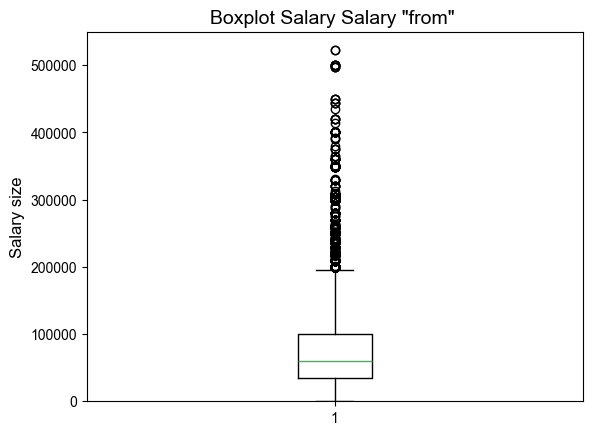

In [19]:
import matplotlib.pyplot as plt

salary_from_stat_na = salary_from_stat.dropna()
plt.axis(ymin=0, ymax=550000)
plt.boxplot(salary_from_stat_na)
plt.title('Boxplot Salary Salary "from" ', fontsize=14)
plt.ylabel('Salary size', fontsize=12)
plt.style.use('seaborn-v0_8')
plt.show()

Conclusions: Large readings of salaries for vacancies with IT in the diplomatic zone from 200,000 to 400,000. The main data is our box on the graph, it varies from 35,000 to 100,000.

## 3. Analysis of categorical data in the filter. Dataset

### 3.1 Non -ographic analysis

Vacancy analysis

Processing of vacancies

In [20]:
def replace_duplicates_name(wrong_values, correct_value):
    for wrong_value in wrong_values:
        df['name'] = df['name'].replace(wrong_value, correct_value) 

In [21]:
def search_for_similar_name(str):
  district = []
  for name in df['name']:
    if str.lower() in name.lower():
      district.append(name)
  return district

In [22]:
replace_duplicates_name('Программист 1C', 'Программист 1С')
replace_duplicates_name(search_for_similar_name('службы поддержки с техническими знаниями'), 'Специалист службы поддержки с техническими знаниями.')
replace_duplicates_name(search_for_similar_name('поддержки'), 'Специалист службы поддержки.')
replace_duplicates_name(search_for_similar_name('поддержки'), 'Специалист службы поддержки.')
replace_duplicates_name(search_for_similar_name('Ведущий специалист по информационным технологиям'), 'Ведущий специалист по информационным технологиям.')
replace_duplicates_name(search_for_similar_name('1с'), 'Программист 1С')
replace_duplicates_name(search_for_similar_name('1c'), 'Программист 1С')
replace_duplicates_name(search_for_similar_name('1 с'), 'Программист 1С')
replace_duplicates_name(search_for_similar_name('1 c'), 'Программист 1С')

In [23]:
df['name'].describe()

count              50390
unique             21316
top       Программист 1С
freq                4815
Name: name, dtype: object

Conclusion: Most vacancies system administrator

In [24]:
# top 10 vacancies
top_name = df['name'].value_counts()[:10]
top_name

name
Программист 1С                  4815
Специалист службы поддержки.    4195
Системный администратор         1657
Системный аналитик               466
Аналитик                         343
Инженер-программист              328
Графический дизайнер             314
Бизнес-аналитик                  268
Дизайнер                         252
Технический писатель             214
Name: count, dtype: int64

Conclusion: Most vacancies associated with 1C proceeding after processing

Analysis of key skills

In [25]:
key_it_df = df[['key_skills_list','name']]
key_it = key_it_df.explode('key_skills_list').dropna() 

top_it_key = key_it['key_skills_list'].value_counts()
top_it_key = top_it_key[:10]

In [26]:
top_it_key

key_skills_list
SQL                     6379
Linux                   4931
Git                     4581
Английский язык         3967
Работа в команде        3474
Управление проектами    3457
Python                  3242
JavaScript              2769
1С программирование     2591
PostgreSQL              2565
Name: count, dtype: int64

Most requirements for key skills SQL are more than 6t.

### 3.2 Graphic analysis of categorical data

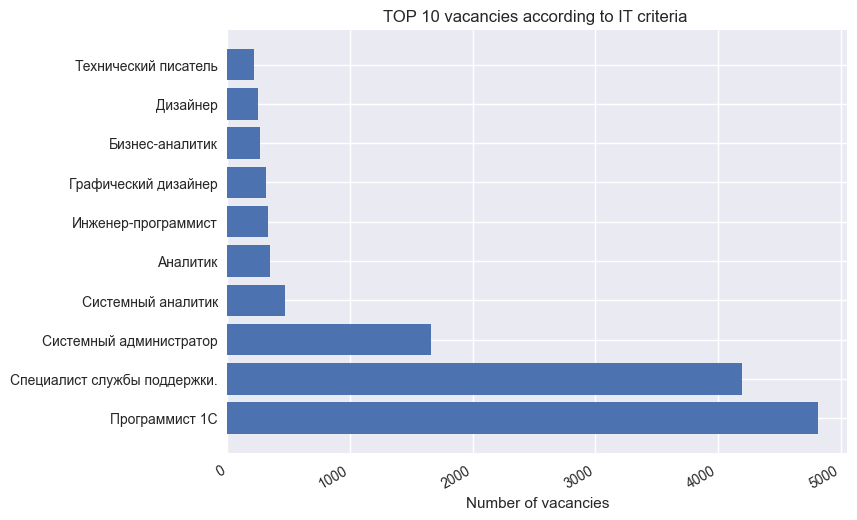

In [27]:
import matplotlib.pyplot as plt

plt.xticks(rotation=30, ha='right')
plt.title('TOP 10 vacancies according to IT criteria ')
plt.style.use('seaborn-v0_8')
plt.xlabel('Number of vacancies')
params = {
    'axes.titlesize':11,
    'xtick.labelsize':12,
    'ytick.labelsize':14,
    'axes.labelsize':14
}
plt.rcParams.update(params)
plt.barh(top_name.index, top_name.values)
plt.show()

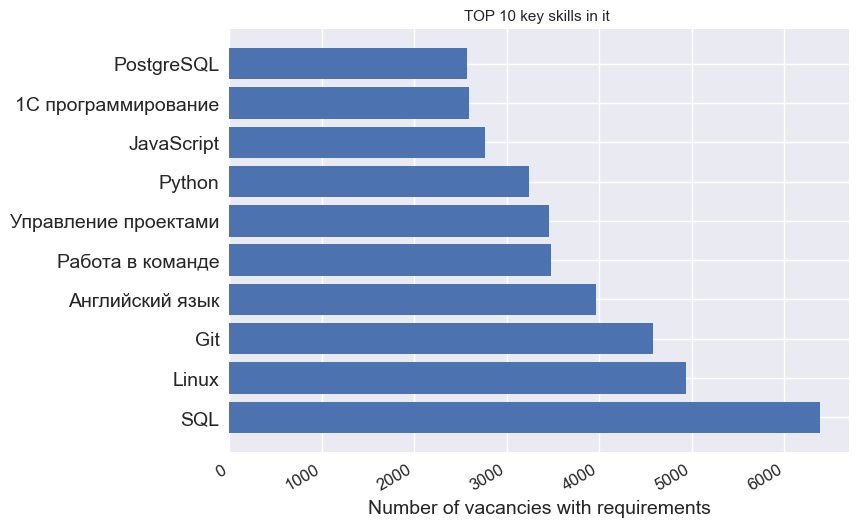

In [28]:
import matplotlib.pyplot as plt

plt.xticks(rotation=30, ha='right')
plt.title('TOP 10 key skills in it ')
plt.style.use('seaborn-v0_8')
plt.xlabel('Number of vacancies with requirements')
params = {
    'axes.titlesize':10,
    'xtick.labelsize':12,
    'ytick.labelsize':14,
    'axes.labelsize':14
}
plt.rcParams.update(params)
plt.barh(top_it_key.index, top_it_key.values)
plt.show()

## 4. The intake of the column

### 4.1 Analysis of the relationship between categorical and numerical variables

In [29]:
top_it_key_list = ['SQL',
                   'Linux',
                   'Git',
                   'English language', 
                   'Teamwork',
                   'Project Management ',
                   'Python','JavaScript',
                   '1C programming',
                   'PostgreSQL']
filter_key = key_it['key_skills_list'].isin(top_it_key_list)

filter_df_key = key_it[filter_key]

In [30]:
top_name_list = ['Programmer 1C', 
                    'Specialist of the Support Service.', 
                    'System administrator', 
                    'System analyst', 
                    'Analyst', 
                    'Engineer-programmist', 
                    'Graphic designer ', 
                    'Business analyst', 
                    'Designer', 
                    'Technical writer']

filter = df['name'].isin(top_name_list)

filter_df = df[filter]

In [31]:
filter_df.groupby('name')['convertred_salary_from'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
Analyst,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business analyst,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Designer,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
System administrator,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Technical writer,1.0,250000.0,NaN,250000.0,250000.0,250000.0,250000.0,250000.0


In [32]:
#The relationship of the profession and the ZP shows in which professions what Mediana zp
filter_df.groupby('name')['convertred_salary_from'].median()

name
Analyst                      NaN
Business analyst             NaN
Designer                     NaN
System administrator         NaN
Technical writer        250000.0
Name: convertred_salary_from, dtype: float64

In [33]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


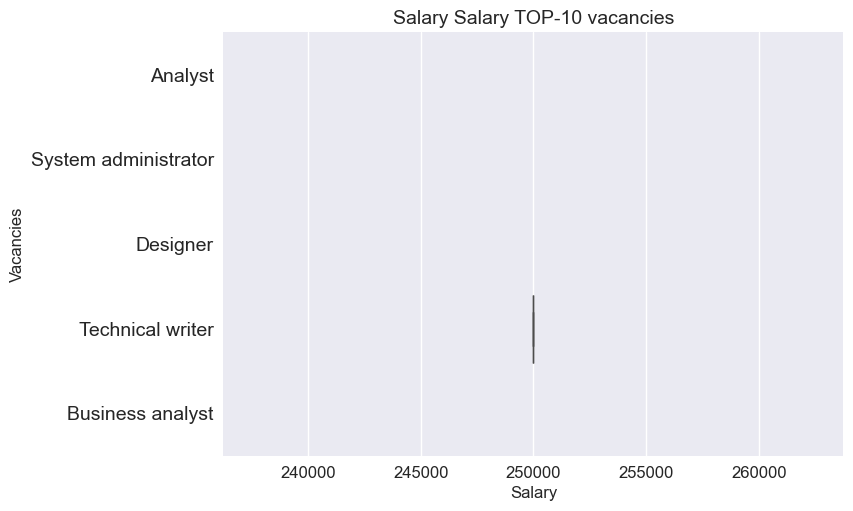

In [34]:
import seaborn as sns

plt.title('Salary Salary TOP-10 vacancies', fontsize=14)
sns.boxplot(x='convertred_salary_from', y='name', data=filter_df)
plt.ylabel('Vacancies', fontsize=12)
plt.xlabel('Salary', fontsize=12)

plt.style.use('seaborn-v0_8-muted')
plt.show()

### 4.2 Analysis of the relationship of two categorical variables

In [35]:
part_df = filter_df[['key_skills_list', 'name']]
part_df = part_df.explode('key_skills_list').dropna()

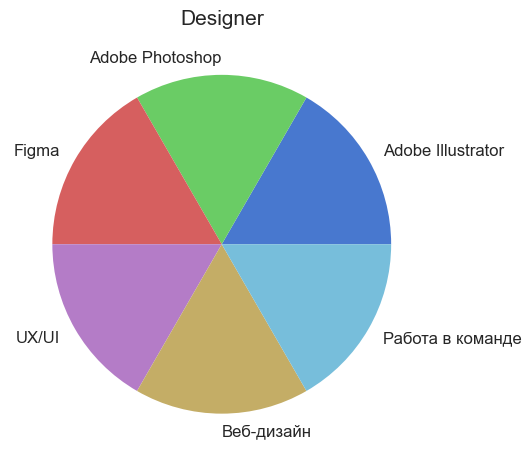

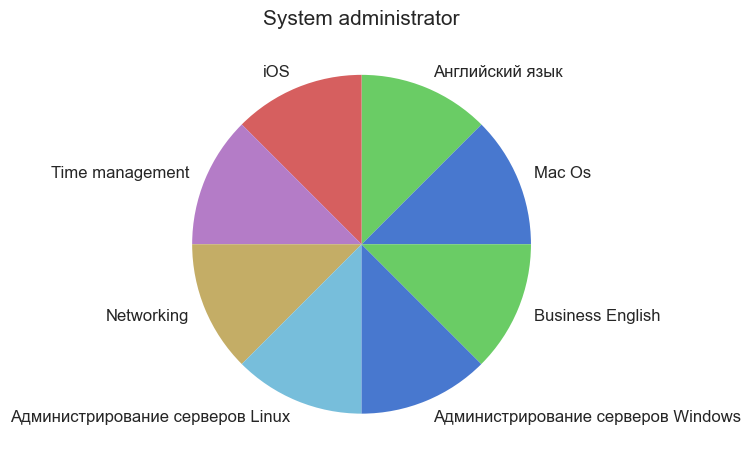

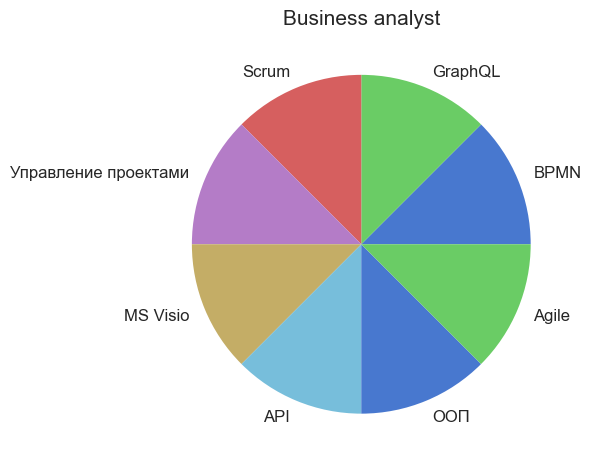

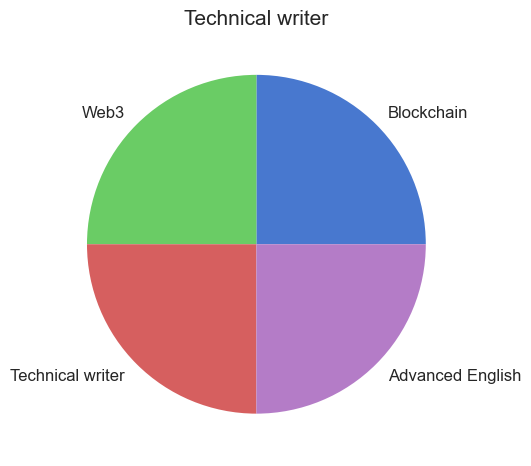

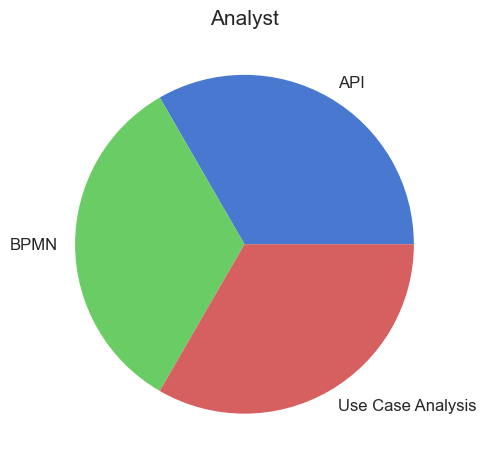

In [36]:
spec_counts = part_df['name'].value_counts()[:10]
spec_counts

spec_types = spec_counts.index
spec_types

import matplotlib.pyplot as plt
for spec_type in spec_types:
  spec_df = part_df[part_df['name'] == spec_type]
  vacancy_counts = spec_df['key_skills_list'].value_counts()
  vacancy_counts = vacancy_counts[:10]
  plt.title(spec_type, fontsize=15)
  plt.pie(vacancy_counts.values, labels =vacancy_counts.index)
  plt.show()

Conclusion: according to the diagrams, you can see which of the key skills are in demand in the TOP 10 vacancies IT

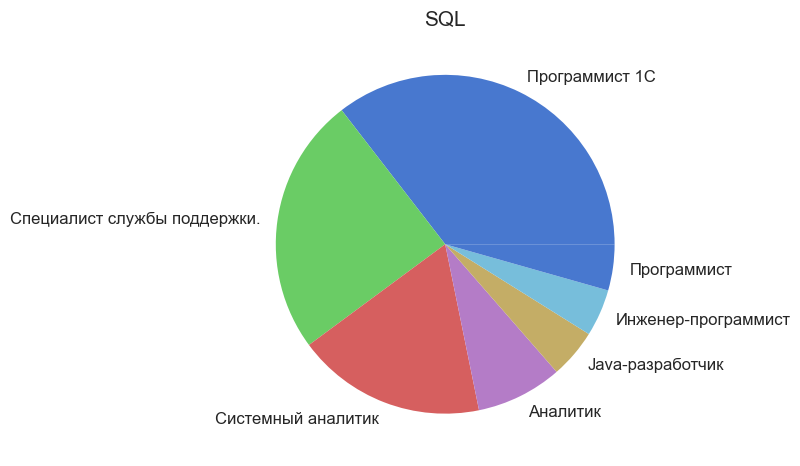

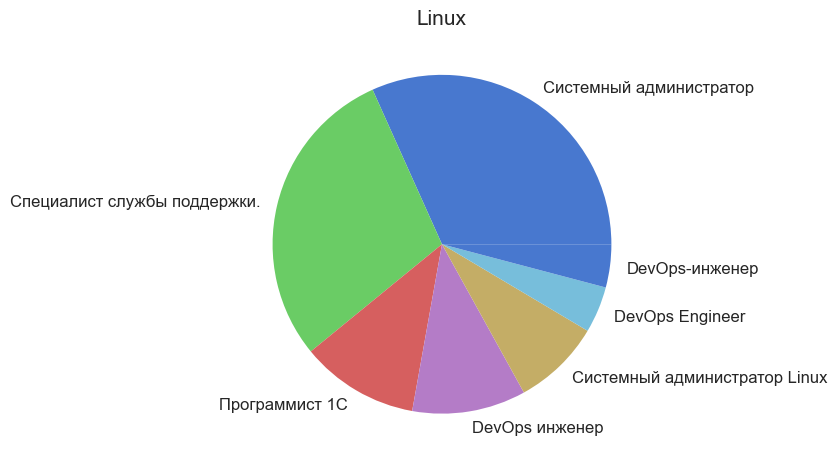

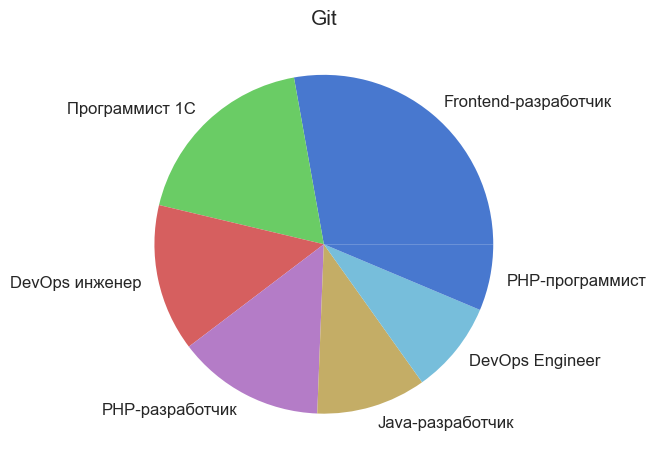

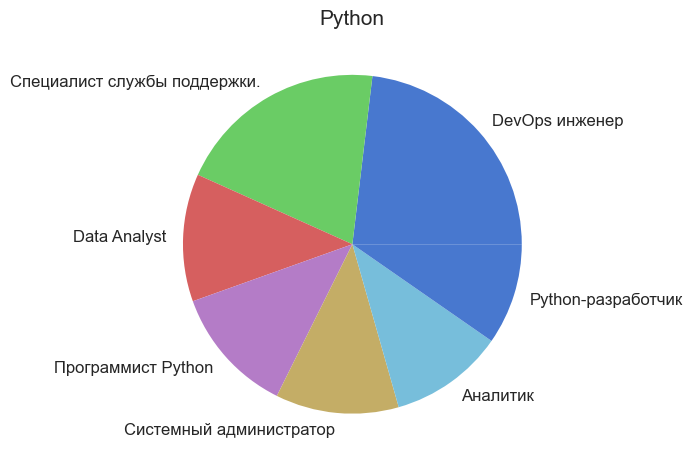

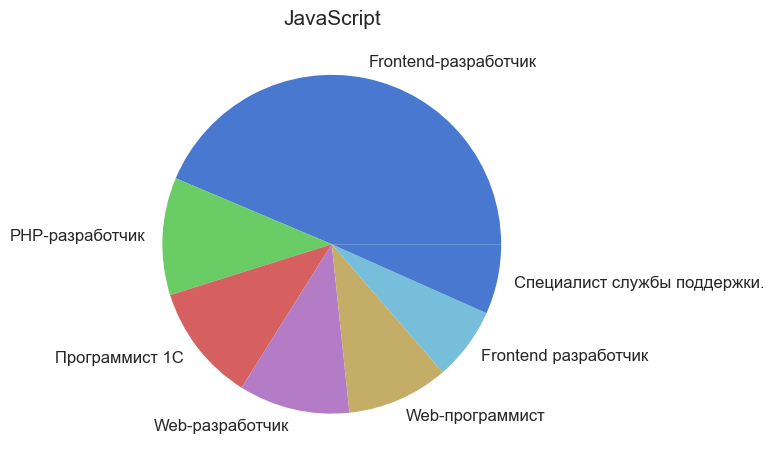

In [37]:
spec_counts = filter_df_key['key_skills_list'].value_counts()[:5]
spec_counts

spec_types = spec_counts.index
spec_types # created a list with the names of 5 most key skills

import matplotlib.pyplot as plt
for spec_type in spec_types:
  spec_df = filter_df_key[filter_df_key['key_skills_list'] == spec_type]
  vacancy_counts = spec_df['name'].value_counts()
  vacancy_counts = vacancy_counts[:7]
  plt.title(spec_type, fontsize=15)
  plt.pie(vacancy_counts.values, labels =vacancy_counts.index)
  plt.show()

Conclusion: according to the diagrams, we can see in which vacancy is more in demand these key skills are in demand

# Statistical data analysis

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.options.display.max_rows = 8

## 1. Structuring the table.

In [39]:
df['employer_json'] = df['employer'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['name']
  except:
    return None
df['employer_list'] = df['employer_json'].apply(get_values)

In [40]:
df['schedule_json'] = df['schedule'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['name']
  except:
    return None
df['schedule_list'] = df['schedule_json'].apply(get_values)

In [41]:
df['experience_json'] = df['experience'].fillna('{}').apply(eval)
def get_values(json):
  try:
    return json['name']
  except:
    return None
df['experience_list'] = df['experience_json'].apply(get_values)

In [42]:
df = df.rename(columns={'convertred_salary_from': 'salary_min', 'convertred_salary_to': 'salary_max'}) 

Table for analysis

In [43]:
df_jobs = df[['name','salary_min','salary_max','employer_list','region','schedule_list','experience_list','key_skills_list']]
df_jobs = df_jobs.rename(columns={'employer_list': 'employer', 'schedule_list':'schedule', 'experience_list':'experience', 'key_skills_list':'key_skills'})
df_jobs = df_jobs.reset_index(drop=True)
df_jobs.head()

,name,salary_min,salary_max,employer,region,schedule,experience,key_skills
0,Младший специалист ручного тестирования,NaN,NaN,Яндекс,Астраханская область,Удаленная работа,Нет опыта,[]
1,Тестировщик.Net,21750.0,43500.0,МФК Саммит,Астраханская область,Полный день,От 1 года до 3 лет,"[Git, SQL, Тестирование, C#, API]"
2,Пентестер,NaN,NaN,SearchInform,Астраханская область,Полный день,От 3 до 6 лет,"[SQL, Linux, Информационная безопасность, Рабо..."
3,Ведущий специалист по информационным технологиям.,22620.0,NaN,Почта России,Астраханская область,Полный день,Нет опыта,"[Пользователь ПК, Работа в команде, 1С: Предпр..."
4,Специалист по защите информации,20000.0,20000.0,ГБПОУ АО Астраханский музыкальный колледж имен...,Астраханская область,Полный день,Нет опыта,"[MS Dos, Диагностика ПК, Компьютер, Работа в у..."


## 2. Definition of data types.

In [44]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50390 entries, 0 to 50389
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        50390 non-null  object 
 1   salary_min  20211 non-null  float64
 2   salary_max  11896 non-null  float64
 3   employer    50390 non-null  object 
 4   region      50390 non-null  object 
 5   schedule    50390 non-null  object 
 6   experience  50390 non-null  object 
 7   key_skills  50390 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.1+ MB


Data types in stat_df: 
1. NAME - categorical type 
2. Salary_ Min, Salary_max - quantitative type 
3. Employer - categorical type 
4. Region - categorical type 
5. Sheedule - categorical type 
6. Experience - categorical type (you can lead to serial)

## 3. Data visualization

### 3.1 Histogram

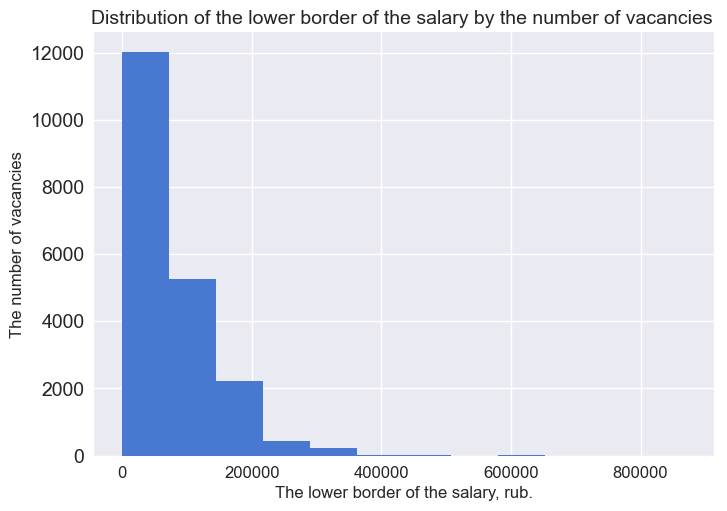

In [45]:
df['salary_min'].hist(bins=12)
plt.title("Distribution of the lower border of the salary by the number of vacancies ", fontsize = 14)
plt.ylabel('The number of vacancies', fontsize = 12) # The signature of the axis y
plt.xlabel('The lower border of the salary, rub.', fontsize = 12) # The signature of the axis X
plt.show()

### 3.2 Column diagrams

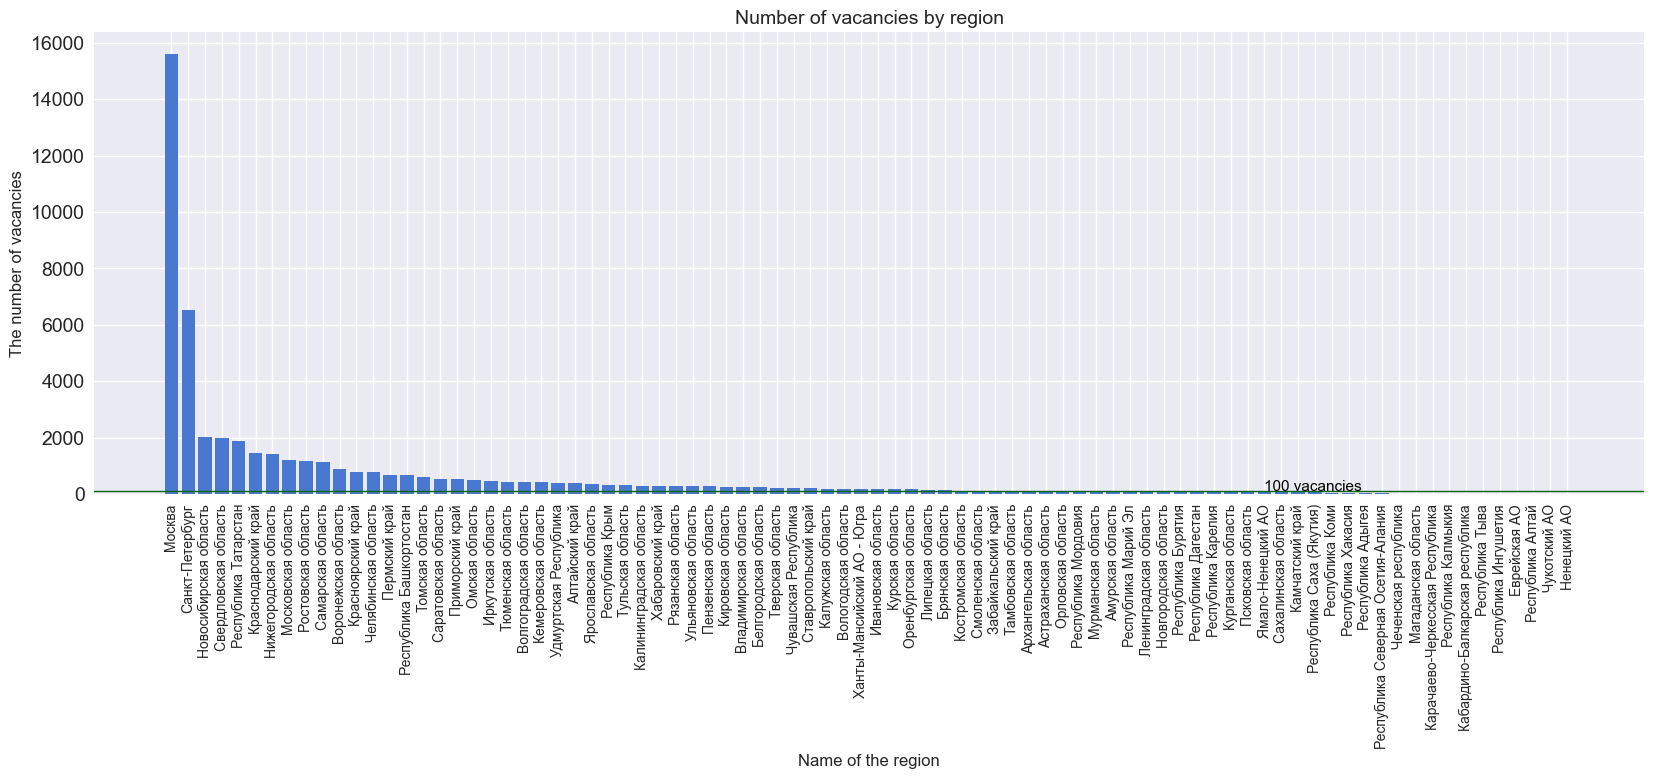

In [46]:
region_vac_count = df['region'].value_counts()
fig = plt.figure(figsize = (20, 6))
plt.bar( region_vac_count.index, region_vac_count)
 
plt.title(label = "Number of vacancies by region", fontsize = 14)
plt.ylabel("The number of vacancies",  fontsize = 12)
plt.xlabel( "Name of the region", size = 12)
plt.xticks(fontsize = 10, rotation = 90) # Signature turning 90 degrees

plt.axhline( y=100, color = 'darkgreen', linewidth=1)
plt.text(x=65, y=110,  s='100 vacancies', size=11, color='black')

plt.show()

### 3.3 circular diagrams

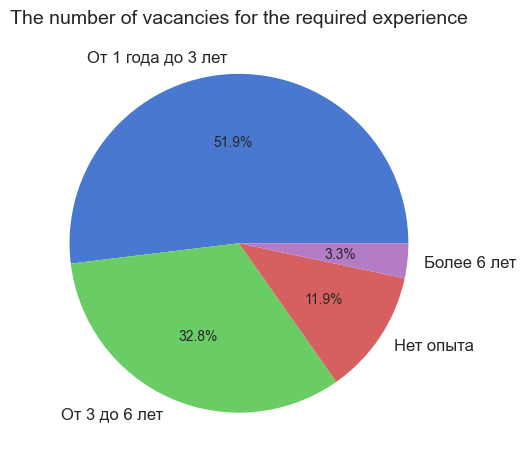

In [47]:
experience_count = df['experience_list'].value_counts()

plt.pie(experience_count, labels = experience_count.index, autopct='%1.1f%%')
plt.title(label = "The number of vacancies for the required experience", fontsize = 14)
plt.show()

## 4. Hypothesis about the type of distribution

> For quantitative indicators, check the hypotheses about the distribution form.

## criterion of Shapiro-Uylka

> Works with samples up to 5000 observations

> Hypothesis H0: The observed sample belongs to a normal general population, we consider the level of significance equal to 0.05

In [48]:
stats.shapiro(df_jobs['salary_min'].dropna())

C:\Users\global\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20211.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.8285039534999585, pvalue=2.4615591617002015e-89)

In [49]:
stats.shapiro(df_jobs['salary_max'].dropna())

C:\Users\global\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11896.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.8124858197529761, pvalue=4.2556425559581687e-79)

Conclusion: We reject the zero hypothesis in favor of the alternative, we cannot say that our sample belongs to the normal general population, according to the quantitative data of Salary Min, and Salary Max

## criterion of asymmetry and excess 

> The asymmetry coefficient, in a normally distributed sample it is 0 (± 1 deviations are possible) 


> Excess coefficient, in a normally distributed sample it is 3 (± 1 deviations are possible)

In [50]:
df_jobs[['salary_min','salary_max']].skew() # asymmetry coefficient

salary_min    1.990356
salary_max    2.289777
dtype: float64

In [51]:
df_jobs[['salary_min','salary_max']].kurtosis() # Excess coefficient

salary_min     6.736627
salary_max    12.670331
dtype: float64

## Test d'Agostino 
> Calculates the final statistics based on the data, namely, excess and asymmetry, to determine whether the distribution of data from the normal distribution named named Ralph d’gostino is rejected

In [52]:
stats.normaltest(df_jobs['salary_min'].dropna())

NormaltestResult(statistic=8681.636444132242, pvalue=0.0)

In [53]:
stats.normaltest(df_jobs['salary_max'])

NormaltestResult(statistic=nan, pvalue=nan)

All 3 methods showed us that we have enough reason to deviate the H0 hypothesis.

## 5. Evaluation of the connection between indicators.

> Depending on data types, evaluate the relationship between indicators. Use: 

* Criteria for comparing groups for analyzing the connection of quantitative or serial indicators with categorical. 
* Analysis of conjugation tables for evaluating the connection of two categorical features. 
* Correlation analysis of the pieron or Spearman for quantitative or serial variables.

### 5.1. Criteria for comparing groups

### *** Check the HIP HEAR: the work schedule does not affect the lower border of wages. *** 

> Therefore, the alternative hypothesis H1 will sound like: the work schedule affects the lower border of wages. 

> We consider the level of significance equal to 0.05.

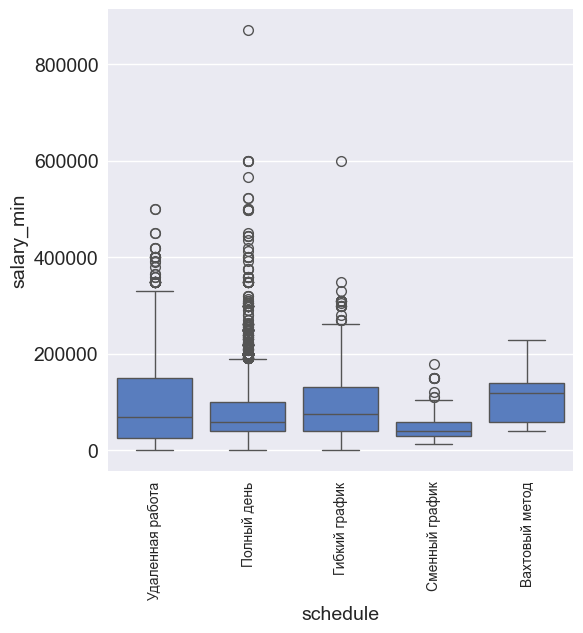

In [54]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='schedule', y='salary_min', data=df_jobs)
plt.xticks(fontsize = 10, rotation = 90) # Signature turning 90 degrees
plt.show()

In [55]:
df_jobs.loc[(df_jobs['salary_min'] > 800000) & (df_jobs['schedule'] == 'Full day')]

,name,salary_min,salary_max,employer,region,schedule,experience,key_skills


In [56]:
df_jobs=df_jobs.drop(df_jobs.index[[33820]])

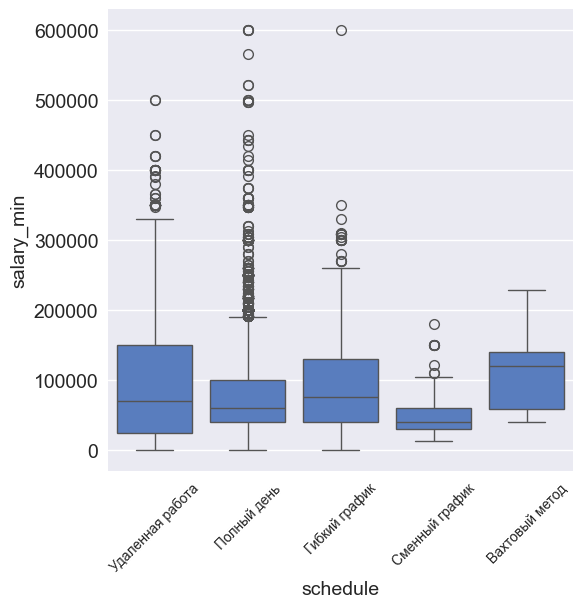

In [57]:
df1 = df_jobs.drop(df_jobs.loc[(df_jobs['schedule'] == 'Full day') & (df_jobs['salary_min'] > 120_000)].index)
df1 = df1.drop(df1.loc[(df1['schedule'] == 'Remote work') & (df1['salary_min'] > 310_000)].index)
df1 = df1.drop(df1.loc[(df1['schedule'] == 'Flexible schedule') & (df1['salary_min'] > 245_000)].index)
df1 = df1.drop(df1.loc[(df1['schedule'] == 'Small schedule') & (df1['salary_min'] > 100_000)].index)

f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='schedule', y='salary_min', data = df1)
plt.xticks(fontsize = 10, rotation = 45) # Signature turning 90 degrees
plt.show()

In [58]:
dfd1=np.array(df_jobs[df_jobs['schedule']=='Сменный график']['salary_min'])
dfd2=np.array(df_jobs[df_jobs['schedule']=='Полный день']['salary_min'])
dfd3=np.array(df_jobs[df_jobs['schedule']=='Гибкий график']['salary_min'])
dfd4=np.array(df_jobs[df_jobs['schedule']=='Удаленная работа']['salary_min'])
dfd5=np.array(df_jobs[df_jobs['schedule']=='Вахтовый метод']['salary_min'])
stats.mstats.kruskalwallis(dfd1,dfd2,dfd3,dfd4,dfd5)

KruskalResult(statistic=267.0596677876404, pvalue=1.3726144811928619e-56)

The P-Value indicator is less than 0.5, therefore we have enough reason to deviate the H0 hypothesis. We take the H1 hypothesis: the work schedule affects the lower border of wages.

### 5.2 Analysis of the conjugation of two categorical features.

We evaluate the statistical significance of the differences in two relative indicators: work experience and work schedule. 
Hypothesis H0: Work experience does not affect the work schedule.

In [59]:
wd=pd.crosstab(df_jobs['experience'],df_jobs['schedule']); wd

schedule,Вахтовый метод,Гибкий график,Полный день,Сменный график,Удаленная работа
experience,,,,,
Более 6 лет,9,62,1326,1,276
Нет опыта,2,295,3598,331,1783
От 1 года до 3 лет,48,1075,19932,512,4594
От 3 до 6 лет,65,625,12212,72,3571


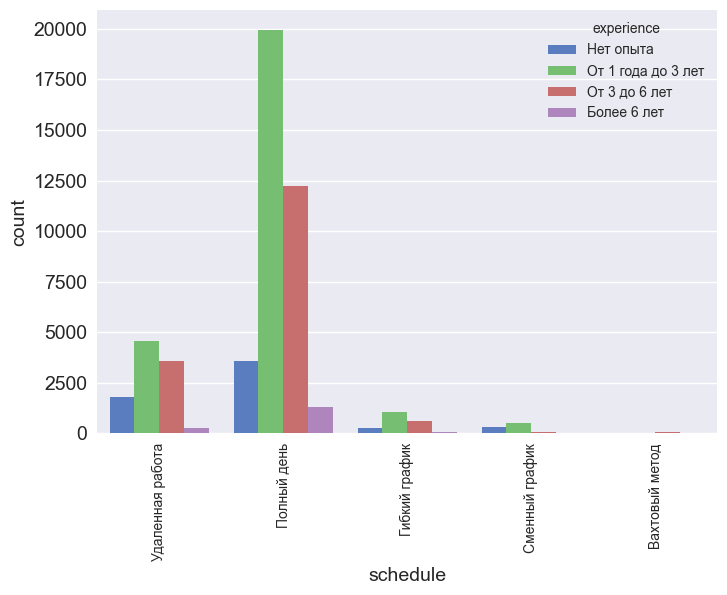

In [60]:
sns.countplot(x=df_jobs['schedule'], hue=df_jobs['experience'])
plt.xticks(fontsize = 10, rotation = 90)
plt.show()

In [61]:
chi2, prob, sdf, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, sdf, prob))

test Statistics: 1272.692226368342
degrees of freedom: 12
p-value: 3.811541481136244e-265



We see that P-Value is less than our level of significance. Therefore, we must reject zero and take an alternative hypothesis that work experience affects the work schedule. But on the graph, we see that the most vacancies are most of the full day. That is, the experience itself does not affect the work schedule.

### 5.3 Correlation analysis

We give a column with experience to ordinal variables.

In [62]:
df_jobs['experience'].unique()

array(['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет'],
      dtype=object)

In [63]:
def exp(row):
  if row == 'Нет опыта':
    return '0'
  if row == 'От 1 года до 3 лет':
    return '1'
  if row == 'От 3 до 6 лет':
    return '2'
  if row == 'Более 6 лет':
    return '3'

df_jobs['experience_p'] = df_jobs['experience'].apply(exp).astype(np.int32)

df_jobs

,name,salary_min,salary_max,employer,region,schedule,experience,key_skills,experience_p
0,Младший специалист ручного тестирования,NaN,NaN,Яндекс,Астраханская область,Удаленная работа,Нет опыта,[],0
1,Тестировщик.Net,21750.0,43500.0,МФК Саммит,Астраханская область,Полный день,От 1 года до 3 лет,"[Git, SQL, Тестирование, C#, API]",1
2,Пентестер,NaN,NaN,SearchInform,Астраханская область,Полный день,От 3 до 6 лет,"[SQL, Linux, Информационная безопасность, Рабо...",2
3,Ведущий специалист по информационным технологиям.,22620.0,NaN,Почта России,Астраханская область,Полный день,Нет опыта,"[Пользователь ПК, Работа в команде, 1С: Предпр...",0
...,...,...,...,...,...,...,...,...,...
50386,Программист 1С,130000.0,NaN,Окраина,Тульская область,Полный день,От 1 года до 3 лет,"[1С: Управление Торговлей, 1С: Предприятие 8, ...",1
50387,Начальник отдела информационных технологий,50000.0,NaN,ГУЗ ГБ № 3 Г.Тулы,Тульская область,Полный день,От 1 года до 3 лет,"[Организаторские навыки, Работа в команде, Упр...",1
50388,"Технический директор (DevOps, технолог)",85000.0,NaN,ИнтерЛабс,Тульская область,Полный день,От 3 до 6 лет,[],2
50389,Начальник отдела по защите информации и информ...,NaN,NaN,"ТИТАН-2, холдинг",Тульская область,Полный день,Более 6 лет,"[Информационная безопасность, Аудит безопаснос...",3


To conduct an analysis using the criterion, we need no passes in the data. To get rid of passes in the salary column, we will replace empty media values.

In [64]:
df_jobs.loc[df_jobs['salary_min'].isna(), 'salary_min'] = df_jobs['salary_min'].median()
df_jobs.loc[df_jobs['salary_max'].isna(), 'salary_max'] = df_jobs['salary_max'].median()

In [65]:
df_jobs['salary_min']

0         60000.0
1         21750.0
2         60000.0
3         22620.0
           ...   
50386    130000.0
50387     50000.0
50388     85000.0
50389     60000.0
Name: salary_min, Length: 50389, dtype: float64

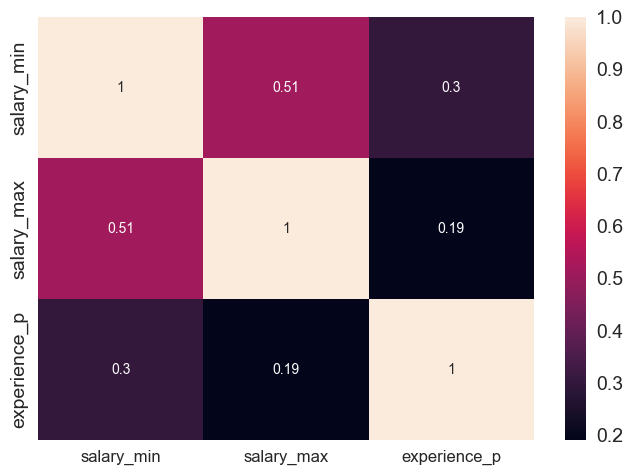

In [66]:
num = ['salary_min','salary_max','experience_p']
hm = sns.heatmap(df_jobs[num].corr(),annot=True)

In [67]:
scipy.stats.pearsonr(df_jobs.salary_min, df_jobs.salary_max)

PearsonRResult(statistic=0.514268706738741, pvalue=0.0)

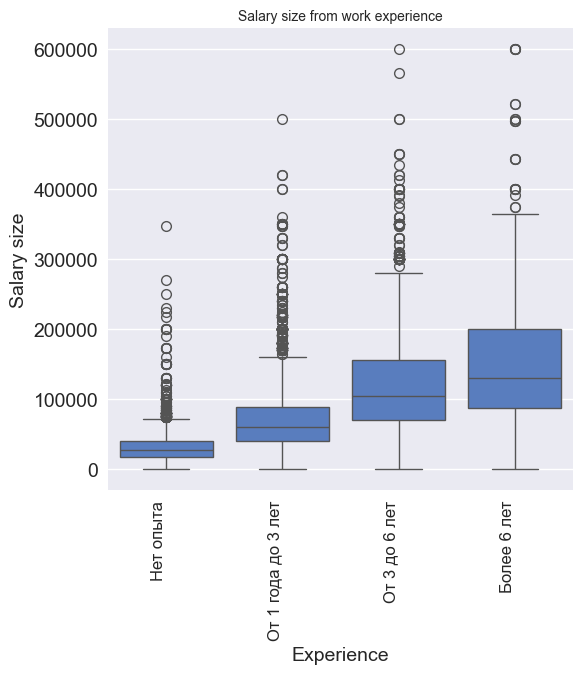

In [68]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='experience', y='salary_min', data=df1)
plt.xticks(rotation=90, ha='right')
plt.title('Salary size from work experience')
plt.xlabel('Experience')
plt.ylabel('Salary size')
plt.show()

Naturally, we see that the minimum and maximum salary are connected. And also, the salary is connected with work experience, since the value of P-Value is close to zero, so we reliably reject the hypothesis of the absence of communication.

## 6. The formulation of the hypothesis.

### ** Hypothesis H0: ** Possession of SQL skills does not affect the level of analysts salary.

In [69]:
name_analyst = df_jobs.loc[df_jobs['name'] == 'Аналитик']
name_analyst['key_skills'][:5]

147    [Пользователь ПК, MS Excel, 1С: Торговля и склад]
447    [MS PowerPoint, Мониторинг СМИ, Социальные сет...
457    [Работа с базами данных, Работа в команде, Раб...
460    [Работа в команде, Грамотная речь, Анализ рынк...
981    [Работа в команде, Аналитические исследования,...
Name: key_skills, dtype: object

In [70]:
def sql_key(row):
  if 'SQL' in row:
    return 1
  return 0

name_analyst['sql'] = name_analyst['key_skills'].apply(sql_key)
name_analyst

C:\Users\global\AppData\Local\Temp\ipykernel_60056\1104321780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_analyst['sql'] = name_analyst['key_skills'].apply(sql_key)


,name,salary_min,salary_max,employer,region,schedule,experience,key_skills,experience_p,sql
147,Аналитик,60000.0,90000.0,Sumitec International,Хабаровский край,Полный день,От 1 года до 3 лет,"[Пользователь ПК, MS Excel, 1С: Торговля и склад]",1,0
447,Аналитик,60000.0,90000.0,Диалог Регионы,Рязанская область,Полный день,От 1 года до 3 лет,"[MS PowerPoint, Мониторинг СМИ, Социальные сет...",1,0
457,Аналитик,65000.0,85000.0,Граськова Ирина,Рязанская область,Полный день,От 1 года до 3 лет,"[Работа с базами данных, Работа в команде, Раб...",1,0
460,Аналитик,39150.0,90000.0,"Грейн Холдинг, Управляющая компания",Рязанская область,Полный день,От 1 года до 3 лет,"[Работа в команде, Грамотная речь, Анализ рынк...",1,0
...,...,...,...,...,...,...,...,...,...,...
49691,Аналитик,45000.0,55000.0,Крестьянское хозяйство Волкова А.П.,Кемеровская область,Удаленная работа,От 1 года до 3 лет,"[Работа с большим объемом информации, MS Power...",1,0
49702,Аналитик,40000.0,90000.0,СГМК-Трейд,Кемеровская область,Полный день,От 1 года до 3 лет,"[MS PowerPoint, VBA, SQL, Ответственность, Вни...",1,1
49710,Аналитик,60000.0,90000.0,ЕВРАЗ,Кемеровская область,Полный день,От 1 года до 3 лет,"[MS PowerPoint, Проведение презентаций, Делова...",1,0
50103,Аналитик,26100.0,90000.0,Центр опережающей профессиональной подготовки ...,Тульская область,Полный день,Нет опыта,[],0,0


In [71]:
name_analyst.groupby('sql')['salary_min'].mean()

sql
0    55327.795097
1    68153.023256
Name: salary_min, dtype: float64

In [72]:
m = name_analyst.groupby('sql')['salary_min'].mean()

In [73]:
n0 = name_analyst[name_analyst['sql'] == 0]
n1 = name_analyst[name_analyst['sql'] == 1]
scipy.stats.mannwhitneyu(n0['salary_min'], n1['salary_min'])


MannwhitneyuResult(statistic=7812.0, pvalue=2.7767640890806662e-06)

** So, ** p-value is less than our level of significance, which means the knowledge of SQL affects the level of salary.

In [74]:
def python_key(row):
  if 'Python' in row:
    return 1
  return 0

name_analyst['python'] = name_analyst['key_skills'].apply(python_key)
name_analyst

C:\Users\global\AppData\Local\Temp\ipykernel_60056\3996052692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_analyst['python'] = name_analyst['key_skills'].apply(python_key)


,name,salary_min,salary_max,employer,region,schedule,experience,key_skills,experience_p,sql,python
147,Аналитик,60000.0,90000.0,Sumitec International,Хабаровский край,Полный день,От 1 года до 3 лет,"[Пользователь ПК, MS Excel, 1С: Торговля и склад]",1,0,0
447,Аналитик,60000.0,90000.0,Диалог Регионы,Рязанская область,Полный день,От 1 года до 3 лет,"[MS PowerPoint, Мониторинг СМИ, Социальные сет...",1,0,0
457,Аналитик,65000.0,85000.0,Граськова Ирина,Рязанская область,Полный день,От 1 года до 3 лет,"[Работа с базами данных, Работа в команде, Раб...",1,0,0
460,Аналитик,39150.0,90000.0,"Грейн Холдинг, Управляющая компания",Рязанская область,Полный день,От 1 года до 3 лет,"[Работа в команде, Грамотная речь, Анализ рынк...",1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49691,Аналитик,45000.0,55000.0,Крестьянское хозяйство Волкова А.П.,Кемеровская область,Удаленная работа,От 1 года до 3 лет,"[Работа с большим объемом информации, MS Power...",1,0,0
49702,Аналитик,40000.0,90000.0,СГМК-Трейд,Кемеровская область,Полный день,От 1 года до 3 лет,"[MS PowerPoint, VBA, SQL, Ответственность, Вни...",1,1,0
49710,Аналитик,60000.0,90000.0,ЕВРАЗ,Кемеровская область,Полный день,От 1 года до 3 лет,"[MS PowerPoint, Проведение презентаций, Делова...",1,0,0
50103,Аналитик,26100.0,90000.0,Центр опережающей профессиональной подготовки ...,Тульская область,Полный день,Нет опыта,[],0,0,0


In [75]:
name_analyst.groupby('python')['salary_min'].mean()

python
0    58129.032618
1    63596.153846
Name: salary_min, dtype: float64

In [76]:
n0 = name_analyst[name_analyst['python'] == 0]
n1 = name_analyst[name_analyst['python'] == 1]
scipy.stats.mannwhitneyu(n0['salary_min'], n1['salary_min'])

MannwhitneyuResult(statistic=3345.0, pvalue=0.06608927569679994)

**So,** p-value is greater than our level of significance, which means we conclude that the knowledge of Pythona does not affect the level of salary.

# Conclusion

So, 
* The work schedule affects the level of salary. The highest paid work with a remote work schedule, the following in importance is the shift method. 
* From the graph it can be seen that the most full -time vacancies are most. 
* Work experience affects the level of salaries, the more experience, the greater the salary. 
* For analysts, knowledge of SQL increases the level of salary, but Python knowledge does not affect the income level.

In [77]:
# from google.colab import files

# df_jobs.to_csv('df_jobs.csv')
# files.download('df_jobs.csv')

In [78]:
#df_jobs2 = df_jobs.loc[df_jobs['name'].value_counts().head(1000)]
#df_jobs2

In [79]:
#from google.colab import files

#df_jobs2.to_csv('df_jobs2.csv', index=False)
#files.download('df_jobs2.csv')